In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing

##Data Cleaning
import nltk #
import string #to remove all punctuation marks in the corpus/ document
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from sklearn.model_selection import train_test_split

ps = nltk.PorterStemmer()

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score
# set plot style
sns.set()

# Loading Data 

In [51]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

Show the full detail whithin a dataframe

In [52]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-52-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [53]:
#view original dataframe 
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


# 1.__Removing twitter handles__ 

We remove the twitter handles from the dataset because it doesn't contribute to `solving our problem`

In [54]:
# function to remove the pattern ‘@user’ from all the tweets in our data.
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [55]:
df_train['removed_user'] = np.vectorize(remove_pattern)(df_train['message'], "@[\w]*")
df_train.head()

,sentiment,message,tweetid,removed_user
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It's not like we lack evidence of anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"


#  2.__Removing short words__

Removing words that have a length less than `3`.

In [56]:
df_train['short_words'] = df_train['removed_user'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df_train.head(10)

,sentiment,message,tweetid,removed_user,short_words
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via","PolySciMajor chief doesn't think carbon dioxide main cause global warming and.. wait, what!? https://t.co/yeLvcEFXkC"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It's not like we lack evidence of anthropogenic global warming,It's like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,Researchers have three years climate change before it’s late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#TodayinMaker# WIRED 2016 pivotal year climate change https://t.co/44wOTxTLcD
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight","It's 2016, racist, sexist, climate change denying bigot leading polls. #ElectionNight"
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,Worth read whether don't believe climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j
6,1,RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,294933,RT : Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,Mike Pence doesn’t believe global warming that smoking causes lung cancer. https://t.co/gvWYaauU8R
7,1,"RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦",992717,"RT : Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦","things today fight climate change, climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦"
8,1,"@AceofSpadesHQ My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.",664510,"My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.",nephew inconsolable. wants like will perish fiery hellscape climate change.
9,1,RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………,260471,RT : no offense… but like… how do you just not believe… in global warming………,offense… like… just believe… global warming………


 # 3.__Remove url__

Remove urls and replace with `urlweb`

In [58]:
### Remove urls and replace them with the word 'url-web'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'urlweb'
df_train['removed_url'] = df_train['short_words'].replace(to_replace = pattern_url, value = subs_url, regex = True)

##Convert all lowercase to uppercase
df_train['removed_url'] = df_train['removed_url'].str.lower()


df_train.head()

,sentiment,message,tweetid,removed_user,short_words,removed_url
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via","PolySciMajor chief doesn't think carbon dioxide main cause global warming and.. wait, what!? https://t.co/yeLvcEFXkC","polyscimajor chief doesn't think carbon dioxide main cause global warming and.. wait, what!? urlweb"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It's not like we lack evidence of anthropogenic global warming,It's like lack evidence anthropogenic global warming,it's like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,Researchers have three years climate change before it’s late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,researchers have three years climate change before it’s late urlweb urlweb…
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#TodayinMaker# WIRED 2016 pivotal year climate change https://t.co/44wOTxTLcD,#todayinmaker# wired 2016 pivotal year climate change urlweb
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight","It's 2016, racist, sexist, climate change denying bigot leading polls. #ElectionNight","it's 2016, racist, sexist, climate change denying bigot leading polls. #electionnight"


# 4.__Final Removal__

- punctuation
- numbers
- special character

Here we will replace everything except `hashtags`

In [61]:
df_train['tidy_message'] = df_train['removed_url'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-61-2a7c5de9261a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['tidy_message'] = df_train['removed_url'].str.replace("[^a-zA-Z#]", " ")


In [10]:
df_train.head()

,sentiment,message,tweetid,removed_user,short_words,removed_url,tidy_message
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via","PolySciMajor chief doesn't think carbon dioxide main cause global warming and.. wait, what!? https://t.co/yeLvcEFXkC","polyscimajor chief doesn't think carbon dioxide main cause global warming and.. wait, what!? url-web",polyscimajor chief doesn t think carbon dioxide main cause global warming and wait what url web
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It's not like we lack evidence of anthropogenic global warming,It's like lack evidence anthropogenic global warming,it's like lack evidence anthropogenic global warming,it s like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,Researchers have three years climate change before it’s late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,researchers have three years climate change before it’s late url-web url-web…,researchers have three years climate change before it s late url web url web
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#TodayinMaker# WIRED 2016 pivotal year climate change https://t.co/44wOTxTLcD,#todayinmaker# wired 2016 pivotal year climate change url-web,#todayinmaker# wired pivotal year climate change url web
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight","It's 2016, racist, sexist, climate change denying bigot leading polls. #ElectionNight","it's 2016, racist, sexist, climate change denying bigot leading polls. #electionnight",it s racist sexist climate change denying bigot leading polls #electionnight


# 5.__Tokenization__

In [62]:
tokenized_tweet = df_train['tidy_message'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [polyscimajor, chief, doesn, t, think, carbon, dioxide, main, cause, global, warming, and, wait, what, urlweb]
1    [it, s, like, lack, evidence, anthropogenic, global, warming]                                                 
2    [researchers, have, three, years, climate, change, before, it, s, late, urlweb, urlweb]                       
3    [#todayinmaker#, wired, pivotal, year, climate, change, urlweb]                                               
4    [it, s, racist, sexist, climate, change, denying, bigot, leading, polls, #electionnight]                      
Name: tidy_message, dtype: object

# 6.__Stop words__

In [63]:
stopword = nltk.corpus.stopwords.words('english')

In [64]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
stop_words = tokenized_tweet.apply(lambda x: remove_stopwords(x))
stop_words.head()

0    [polyscimajor, chief, think, carbon, dioxide, main, cause, global, warming, wait, urlweb]
1    [like, lack, evidence, anthropogenic, global, warming]                                   
2    [researchers, three, years, climate, change, late, urlweb, urlweb]                       
3    [#todayinmaker#, wired, pivotal, year, climate, change, urlweb]                          
4    [racist, sexist, climate, change, denying, bigot, leading, polls, #electionnight]        
Name: tidy_message, dtype: object

# 7.__Lemmatisation__

In [14]:
#nltk.download('wordnet')
def train_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

lemmatizer = WordNetLemmatizer()

df_lemma = stop_words.apply(train_lemma, args=(lemmatizer, ))

# 8.__Final data__

In [65]:
df_lemma.head()

0    [polyscimajor, chief, think, carbon, dioxide, main, cause, global, warming, wait, url, web]
1    [like, lack, evidence, anthropogenic, global, warming]                                     
2    [researcher, three, year, climate, change, late, url, web, url, web]                       
3    [#todayinmaker#, wired, pivotal, year, climate, change, url, web]                          
4    [racist, sexist, climate, change, denying, bigot, leading, poll, #electionnight]           
Name: tidy_message, dtype: object

# 9.__Data visualization__

In [66]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

### 9.1 __Generating wordcloud for tweets that are__ `anti-climate change`

In [17]:
anti_climate = ' '.join(text for text in df_train['tidy_message'][df_train['sentiment']==-1])

In [18]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(anti_climate)

#### __Plot the word cloud__

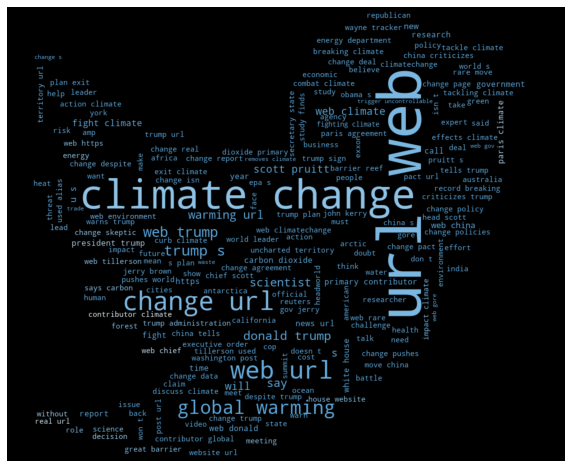

In [67]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

### 9.2 __Generating wordcloud for tweets that are__ `pro change`

In [68]:
pro_climate_change = ' '.join(text for text in df_train['tidy_message'][df_train['sentiment']==2])

In [69]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(pro_climate_change)

#### __Plot the word cloud__

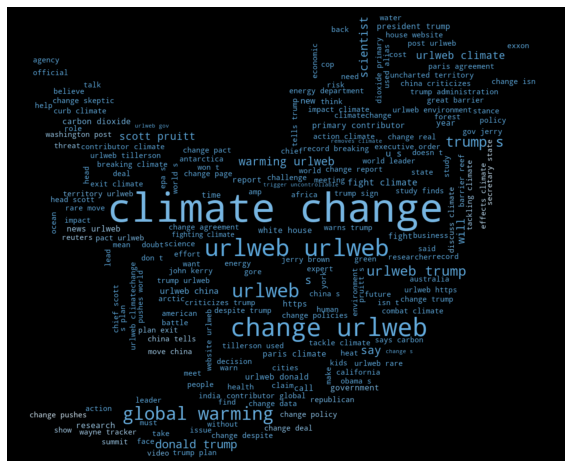

In [71]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

### 9.2 __Extracting the hashtags from the tweets__

#Hashtaging a tweet can make it reach a wider audiance in that regard it would make a good keyword for our `model`. And give us a better consensus within our data 

In [73]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

#### __Pro climate change__

In [74]:
pro_climate_change = Hashtags_Extract(df_train['tidy_message'][df_train['sentiment']==2])

In [75]:
pro_climate_change

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['climate'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['climatechange'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['climatechange'],
 ['climate'],
 [],
 [],
 [],
 [],
 [],
 ['skpol'],
 [],
 ['parisagreement'],
 ['climate', 'environment'],
 [],
 [],
 [],
 [],
 ['climate', 'india'],
 ['greatbarrierreef', 'greatbarrierreef'],
 [],
 [],
 ['exxonmobil'],
 ['greatbarrierreef'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['climatechange', 'cop'],
 [],
 [],
 [],
 [],
 ['climatechange'],
 ['geographyteacher', 'climatechange'],
 [],
 ['mgwvjaiye'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['cleanenergy'],
 ['today'],
 ['climatechange'],
 [],
 [],
 [],
 [],
 ['ceta', 'cetat'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['wine', 'europe'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['worldpenguinday'],
 [],
 [],
 [],
 ['lastnightinsweden'],
 ['environment

In [76]:
pro_climate_change_unnest = sum(pro_climate_change, [])

In [77]:
pro_climate_change_unnest

['climate',
 'climatechange',
 'climatechange',
 'climate',
 'skpol',
 'parisagreement',
 'climate',
 'environment',
 'climate',
 'india',
 'greatbarrierreef',
 'greatbarrierreef',
 'exxonmobil',
 'greatbarrierreef',
 'climatechange',
 'cop',
 'climatechange',
 'geographyteacher',
 'climatechange',
 'mgwvjaiye',
 'cleanenergy',
 'today',
 'climatechange',
 'ceta',
 'cetat',
 'wine',
 'europe',
 'worldpenguinday',
 'lastnightinsweden',
 'environment',
 'nbc',
 'news',
 'bibleprophecy',
 'truth',
 'knowledge',
 'cop',
 'smartnews',
 'climatechange',
 'shellknew',
 'climatechange',
 'cdnpoli',
 'cyclonedebbie',
 'climate',
 'feedly',
 'parisagreement',
 'climate',
 'glo',
 'climatechange',
 'climatechange',
 'climate',
 'inauguration',
 'paginanuova',
 'climate',
 'demforce',
 'climatechange',
 'dsnworld',
 'globalwarning',
 'bigdata',
 'climatechange',
 'climatechange',
 'ankara',
 'london',
 'berlin',
 'news',
 'nzpol',
 'data',
 'environment',
 'climatechange',
 'unfao',
 'readon',
 'd

#### __Create word frequency__

In [85]:
word_freq_pro_climate = nltk.FreqDist(pro_climate_change_unnest)

word_freq_pro_climate

FreqDist({'climate': 137, 'climatechange': 66, 'environment': 47, 'news': 32, 'trump': 25, 'science': 18, 'cop': 17, 'greatbarrierreef': 14, 'parisagreement': 9, 'worldnews': 9, ...})

#### __Create dataframe__

In [86]:
df_pro_climate_change = pd.DataFrame({'Hashtags':list(word_freq_pro_climate.keys()),'Count':list(word_freq_pro_climate.values())})

df_pro_climate_change.head(10)

,Hashtags,Count
0,climate,137
1,climatechange,66
2,skpol,1
3,parisagreement,9
4,environment,47
5,india,1
6,greatbarrierreef,14
7,exxonmobil,2
8,cop,17
9,geographyteacher,1


#### __Plot the data of the most used Hashtags__ `pro climate change`

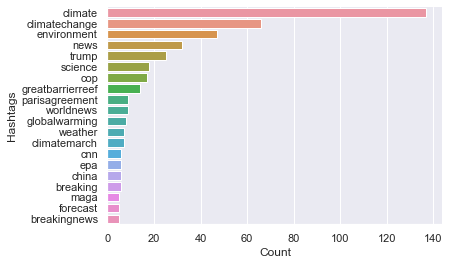

In [87]:
df_pro_climate_change_plot = df_pro_climate_change.nlargest(20,columns='Count')

sns.barplot(data=df_pro_climate_change_plot,y='Hashtags',x='Count')
sns.despine()

#### __Anti climate change__

In [88]:
anti_climate_change = Hashtags_Extract(df_train['tidy_message'][df_train['sentiment']==-1])
anti_climate_change

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['nomorescams', 'nomoredemocrats', 'draintheswamp'],
 [],
 ['fakenews'],
 ['myth', 'maga', 'stepfo'],
 [],
 ['opchemtrails'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['earthday'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['miamibeachbowl'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['liberals'],
 [],
 ['liberallogic'],
 [],
 [],
 ['trump'],
 [],
 [],
 ['qanda'],
 [],
 ['snow', 'egypt'],
 [],
 [],
 [],
 [],
 [],
 ['trump'],
 [],
 ['climatechange'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['marchforbabies'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['lies'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['economy', 'national'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['londonattacks'],
 [],
 [],
 ['standupforscience'],
 ['cashinin'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['climatescam', 'greenscam', 'teaparty', 'tcot', 'pjnet'],
 [],
 ['opchemtrails'],
 [],
 [],
 

In [89]:
anti_climate_change_unnest = sum(anti_climate_change,[])

In [90]:
anti_climate_change_unnest

['nomorescams',
 'nomoredemocrats',
 'draintheswamp',
 'fakenews',
 'myth',
 'maga',
 'stepfo',
 'opchemtrails',
 'earthday',
 'miamibeachbowl',
 'liberals',
 'liberallogic',
 'trump',
 'qanda',
 'snow',
 'egypt',
 'trump',
 'climatechange',
 'marchforbabies',
 'lies',
 'economy',
 'national',
 'londonattacks',
 'standupforscience',
 'cashinin',
 'climatescam',
 'greenscam',
 'teaparty',
 'tcot',
 'pjnet',
 'opchemtrails',
 'blizzard',
 'opchemtrails',
 'maga',
 'trumptrain',
 'dobbs',
 'feedly',
 'sciencecelebs',
 'libtards',
 'unicornsarereal',
 'snowflakes',
 'whywemustimpeachtrumpin',
 'presidenttrump',
 'day',
 'obamacare',
 'maga',
 'bullshit',
 'fakescience',
 'eugenics',
 'science',
 'taxday',
 'trump',
 'sad',
 'climate',
 'eco',
 'green',
 'trump',
 'qanda',
 'planetx',
 'trump',
 'parisagreement',
 'goreeffect',
 'stfu',
 'maga',
 'peoplesclimatemarch',
 'unitednations',
 'co',
 'newvettingquestions',
 'maga',
 'iamaclim',
 'snakeoilsales',
 'liars',
 'fakenews',
 'michaelcr

#### __Create word frequency__

In [33]:
word_freq_anti_climate = nltk.FreqDist(anti_climate_change_unnest)

word_freq_anti_climate

FreqDist({'maga': 14, 'climate': 11, 'trump': 8, 'climatechange': 8, 'globalwarming': 5, 'fakenews': 4, 'opchemtrails': 4, 'tcot': 4, 'parisagreement': 4, 'qanda': 3, ...})

#### __Create dataframe__

In [37]:
df_anti_climate_change = pd.DataFrame({'Hashtags':list(word_freq_anti_climate.keys()),'Count':list(word_freq_anti_climate.values())})

df_anti_climate_change.head(10)

,Hashtags,Count
0,nomorescams,1
1,nomoredemocrats,1
2,draintheswamp,2
3,fakenews,4
4,myth,1
5,maga,14
6,stepfo,1
7,opchemtrails,4
8,earthday,1
9,miamibeachbowl,1


#### __Plot the data of the most used Hashtags__ `anti climate change`

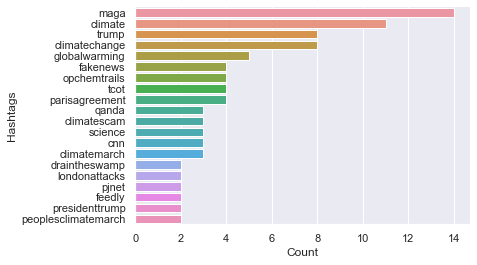

In [91]:
df_anti_climate_change_plot = df_anti_climate_change.nlargest(20,columns='Count') 

sns.barplot(data=df_anti_climate_change_plot,y='Hashtags',x='Count')
sns.despine()

# 10.__Model building__

In [92]:
X = df_lemma
y = df_train['sentiment']

### 10.1 __Split  data__

In [93]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

 ### 10.2 __Vectorize  data__

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
def clean_title(text):
   text = " ".join([word.lower() for word in text if word not in string.punctuation])
   title = re.split('\W+', text)
   text = [ps.stem(word) for word in title if word not in nltk.corpus.stopwords.words('english')]
   return text

In [96]:
#create vector object
cv = CountVectorizer(analyzer=clean_title) 

# transfrom the values based on X_train
X_train_vect = cv.fit_transform(X_train).toarray()

In [97]:
#transform the values X_test
X_test_vect = cv.transform(X_test).toarray()

In [98]:
#convert y_train to array
y_train_vect = np.array(y_train)

### 10.3 __Multinomial naive bayes__

In [99]:
from sklearn.naive_bayes import MultinomialNB 

In [100]:
mn = MultinomialNB()

In [101]:
mn.fit(X_train_vect, y_train_vect)

MultinomialNB()

In [102]:
y_pred = mn.predict(X_test_vect)

In [103]:
print("The accuracy score of the multinomial Naive Bayes is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the multinomial Naive Bayes is: 0.7041719342604298


Classification Report:

               precision    recall  f1-score   support

          -1       0.68      0.28      0.40       278
           0       0.60      0.32      0.42       425
           1       0.73      0.84      0.78      1755
           2       0.68      0.77      0.72       706

    accuracy                           0.70      3164
   macro avg       0.67      0.55      0.58      3164
weighted avg       0.70      0.70      0.68      3164



###  __deploying__

In [104]:
#Create a pickel file using serialization 
import pickle 
pickle_out = open("mn.pkl","wb")
pickle.dump(mn, pickle_out)
pickle_out.close()


In [27]:
import streamlit as st